# 🔲 Regularization in Logistic Regression 

**Regularization** refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.

<center><img src="images/regularization.png" width=1100></center>

In this notebook, we would like to make a binary classification using regression.

In order to do so, we would like to explore a dataset representing the commercialization of a product given two quality tests performed on that latest.

Since we already made a gradient descent algorithm for Logistic Regression on our <a href="https://github.com/kawaremu/MLFromScratch/blob/main/Logistic%20Regression.ipynb">previous notebook</a>, we are going to add a regularization feature to it.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
plt.style.use('seaborn-whitegrid')

In [5]:
df_products = pd.read_csv('data/products.csv')
df_products.head()

,test1,test2,commercialized
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
features = ['test1', 'test2']
target = 'commercialized'

In [7]:
X = df_products[features].values
y = df_products[target].values.astype(np.int32).reshape(-1,1)
X.shape,y.shape

((118, 2), (118, 1))

In [8]:
X[:5],y[:5]

(array([[ 0.051267,  0.69956 ],
        [-0.092742,  0.68494 ],
        [-0.21371 ,  0.69225 ],
        [-0.375   ,  0.50219 ],
        [-0.51325 ,  0.46564 ]]),
 array([[1],
        [1],
        [1],
        [1],
        [1]]))

# 🦮 Data Exploration

A machine learning model and conclusions cannot be made without exploration and visualisation.


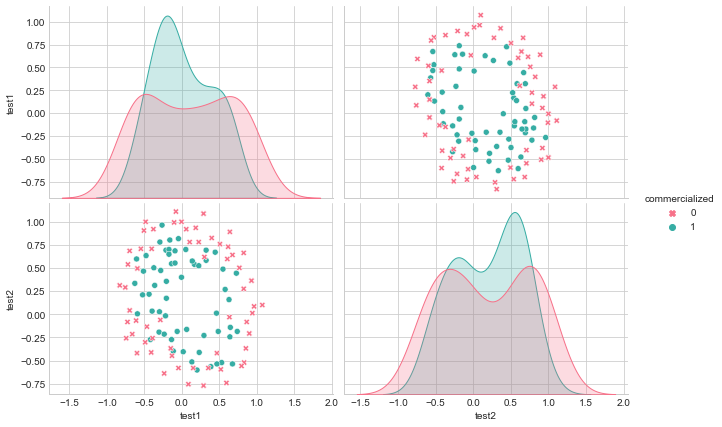

In [9]:
sns.pairplot(df_products, hue='commercialized', height=3,aspect=1.5, palette="husl",markers=["X", "o"])

<AxesSubplot:xlabel='commercialized', ylabel='count'>

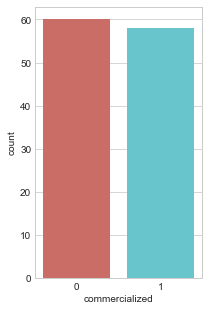

In [10]:
plt.figure(figsize=(3,5))
sns.countplot(x='commercialized',data=df_products,palette='hls')

Let's reuse the functions we made on the previous notebook.

Since we are dealing with a regression problem, we will always need a column of ones stacked to our features that will be multipied by the biais $\theta_{0}$. 

In [11]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  return np.vstack((intercept, X.T)).T

As for every regression problem, weight and biais parameters need to be initialized.

In [12]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

# 👩🏻‍🏫 The problem of Under/Overfitting

In our <a>Linear Regression notebook</a>, we tried to predict the benefice of a village given its number of inhabitants.

<center><img src="images\linear_regression_notebook1.png"></center>


However, some points seem to be *wrongly* misplaced and are not fitting to the line. This means that our model performed poorly and is facing the *Underfitting* problem (or is highly biaised).

It is basically fitting a line to the data and our model has a very strong preconception/biais that our features variables are going to vary linearly with the target. 

In the other side, there is the *Overfitting* problem where the learned hypothesis may fit the training set very well (when we have too many features), but fails to generalize to new examples.

Same problem happened when we did our predictions on the logistic regression problem, some data points are labeled as belonging to the wrong class; it is because the model is too *rigid* at its prediction.

<center><img src="images\draw_boundaries_logistic.png"></center>

# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [15]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,0]
    X2=X[:,1]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [16]:
X2=mapping(X)
X2.shape

(118, 28)

In [17]:
X2

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

0- Fonction mpgistique (Sigmoid)

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

assert sigmoid(0) == 0.5

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [23]:
def h_theta(X,theta):
  return sigmoid(X.dot(theta))

In [24]:
def get_cost(X,y,theta):  
       
    m = len(y)

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    return -1/m * np.sum((y * np.log(h) + (1 - y) * np.log(1 - h)))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [25]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  '''
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  '''
  
  # Number of training examples
  m = len(y)
                    
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  parameters_out = {}
  
  # Append the initial cost
  gd_iterations_df.loc[result_idx]=[0,get_cost(X,y,theta)]
  result_idx += 1
  
  start = time.time()
  for i in range(1,num_iters+1):
    
      # Step 1 : Calculate h = sigmoid(X * theta)
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.dot(X.T, error),axis=1).reshape(-1,1)
      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)

      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - theta = {}'.format(i+1,num_iters,cost,theta))
          
  print('Time spent: {:0.2f}s'.format(time.time()-start))
  parameters_out["bias"] = theta[0][0]
  parameters_out["weight"] = theta[1:]
  return parameters_out,theta, theta_history, J_history,gd_iterations_df 

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [19]:
X = add_theta_0(X)

In [26]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [27]:
initial_cost = get_cost(X,y,theta)
print('initial cost: ',initial_cost)

initial cost:  0.6931471805599454


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.01;

# paramètre de regression
lambdaa = 1;

# Appel
theta = gradient_descent(X, y, theta, alpha, iterations);

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle():
    pass

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X):
    return y_pred


# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

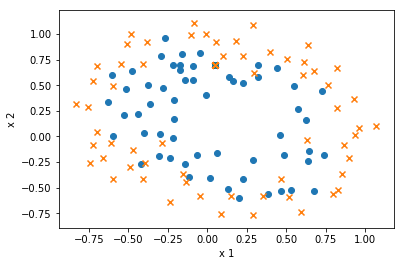

In [12]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage du coût en fonction de theta0 et theta1

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [78]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X)
prcision = np.mean(y==y_pred)*100

# 🔬 Comparison with scikit-learn
Let's compare our implementation with the sklearn library.

# 📚 Ressources and References